In [2]:
!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch torchaudio torchvision torchtext torchdata

Found existing installation: torch 2.2.1+cu121
Uninstalling torch-2.2.1+cu121:
  Successfully uninstalled torch-2.2.1+cu121
Found existing installation: torchaudio 2.2.1+cu121
Uninstalling torchaudio-2.2.1+cu121:
  Successfully uninstalled torchaudio-2.2.1+cu121
Found existing installation: torchvision 0.17.1+cu121
Uninstalling torchvision-0.17.1+cu121:
  Successfully uninstalled torchvision-0.17.1+cu121
Found existing installation: torchtext 0.17.1
Uninstalling torchtext-0.17.1:
  Successfully uninstalled torchtext-0.17.1
Found existing installation: torchdata 0.7.1
Uninstalling torchdata-0.7.1:
  Successfully uninstalled torchdata-0.7.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Import needed modules
import torch
import torchvision
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
os.listdir('./gdrive/My Drive/COMPS492F/Project/material/Nike_Adidas_converse_Shoes_image_dataset/train')

['adidas', 'nike', 'converse']

In [6]:
training_dataset_path = './gdrive/My Drive/COMPS492F/Project/material/Nike_Adidas_converse_Shoes_image_dataset/train'
test_dataset_path = './gdrive/My Drive/COMPS492F/Project/material/Nike_Adidas_converse_Shoes_image_dataset/test'

# training_dataset_path = 'material/Nike_Adidas_converse_Shoes_image_dataset/train'
# test_dataset_path = 'material/Nike_Adidas_converse_Shoes_image_dataset/test'

In [7]:
######### Calculate the mean and standard divetion of the dataset ##########

training_transforms = transforms.Compose([transforms.Resize([240, 240]),
                                          transforms.ToTensor()])

# make training tramsform equal to the traning data path
train_dataset = torchvision.datasets.ImageFolder(root = training_dataset_path, transform = training_transforms)

# data loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = 32,
                                           shuffle = False)

# Get the mean and standard deviation of image dataset
def get_mean_and_std(loader):
  mean = 0. # mean value
  std = 0. # standard divation value
  total_images_count = 0
  for images, _ in loader: # iterate through all of tha batches
    image_count_in_a_batch = images.size(0)
    images = images.view(image_count_in_a_batch, images.size(1), -1) # shape the image from badge
    mean += images.mean(2).sum(0) # calculate the mean
    std += images.std(2).sum(0) # calculate the standard divation
    total_images_count += image_count_in_a_batch # add the total count in the back

  mean /= total_images_count # get the average mean
  std /= total_images_count # get the average std

  return mean, std

get_mean_and_std(train_loader)

(tensor([0.7212, 0.7105, 0.7036]), tensor([0.2245, 0.2250, 0.2288]))

In [6]:
########## Image dataset preparation (Dataloaders and Transforms) ################

train_dataset_path = './gdrive/My Drive/COMPS492F/Project/material/Nike_Adidas_converse_Shoes_image_dataset/train'
test_dataset_path = './gdrive/My Drive/COMPS492F/Project/material/Nike_Adidas_converse_Shoes_image_dataset/test'

# train_dataset_path = 'material/Nike_Adidas_converse_Shoes_image_dataset/train'
# test_dataset_path = 'material/Nike_Adidas_converse_Shoes_image_dataset/test'

mean = [0.7212, 0.7105, 0.7036]
std = [0.2245, 0.2250, 0.2288]

# transform the train and test dataset
train_transforms = transforms.Compose([transforms.Resize([240, 240]), # reduce the average size 240 x 240
                                       transforms.RandomHorizontalFlip(), # randomly flip the image horizontally
                                       transforms.RandomRotation(10), # apply the random rotation to a 10 degrees
                                       transforms.ToTensor(), # convert everything to be a tensor
                                       transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)) # normalization
                                       ])


test_transforms = transforms.Compose([transforms.Resize([240, 240]),
                                      transforms.ToTensor(), # convert everything to be a tensor
                                      transforms.Normalize(torch.Tensor(mean), torch.Tensor(std)) # normalization
                                      ])

# Load the train and test dataset by specifying the path and apply the transform
train_dataset = torchvision.datasets.ImageFolder(root = train_dataset_path, transform = train_transforms)
test_dataset = torchvision.datasets.ImageFolder(root = test_dataset_path, transform = test_transforms)

labels:  tensor([0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 2,
        0, 2, 2, 2, 2, 1, 1, 2])


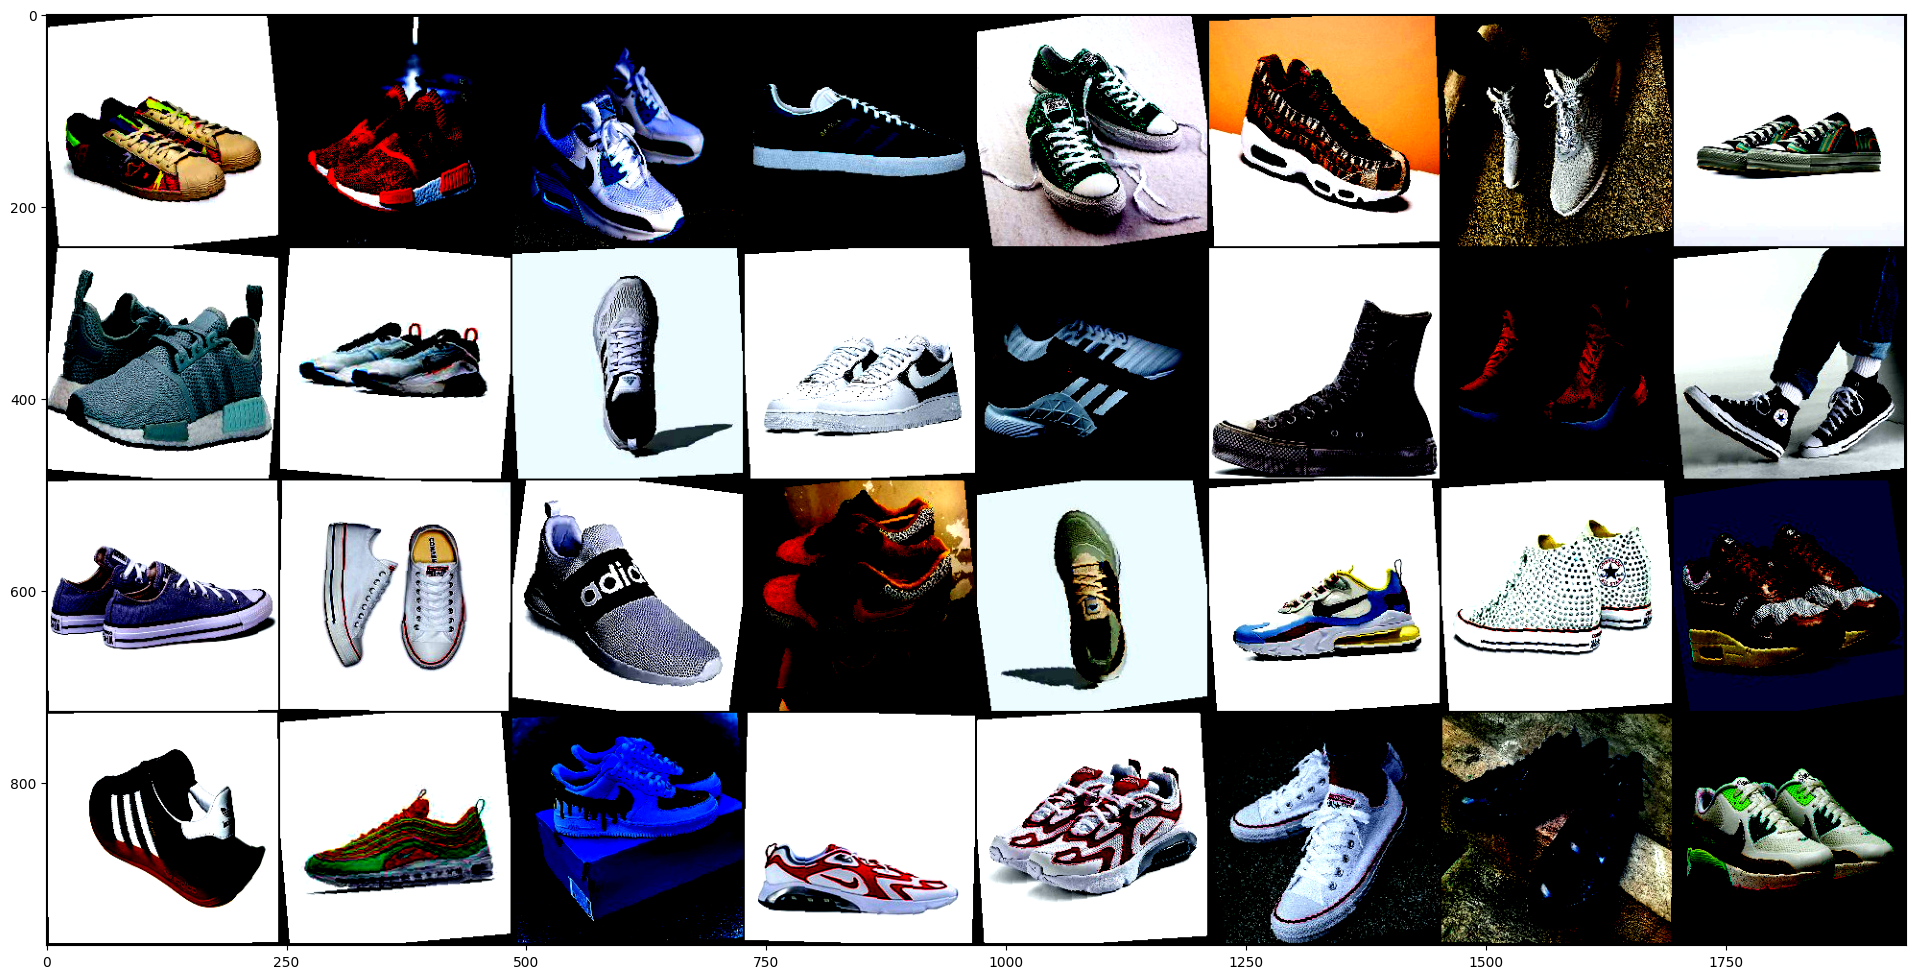

In [7]:
# show the random tranform images
batch_size = 32
def show_transformed_images(dataset):
  loader = torch.utils.data.DataLoader(dataset, batch_size, shuffle = True)
  batch = next(iter(loader))
  images, labels = batch

  grid = torchvision.utils.make_grid(images, nrow = 8)
  plt.figure(figsize = (24,24))
  plt.imshow(np.transpose(grid, (1, 2, 0)))
  print('labels: ', labels)

show_transformed_images(train_dataset)

In [8]:
# test the data loaders pass to neural network
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 10, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 10, shuffle = True)

In [9]:
# Set the device function
def set_device():
  if torch.cuda.is_available():
      dev = 'cuda:0'
  else:
      dev = 'cpu'
  return torch.device(dev)

In [10]:
# model --> ResNet18 model: ImageNet dataset --> over 14 million images and 1000 image categories
# the ImageNet Large Scale Visual Recognition Challenge(ILSVRC) evaluates algorithms object detection and image classification at large scal
# how it performs on the test dataset
#### Train the neural network ###
def train_nn(model, train_loader, test_loader, criterion, optimizer, n_epochs):
  device = set_device()
  best_acc = 0

  for epoch in range(n_epochs): # track all the information
    print("Epoch number %d " % (epoch + 1))
    model.train() # make sure the model switch
    running_loss = 0.0
    running_correct = 0.0
    total = 0

    for data in train_loader:
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)
      total += labels.size(0) # calculate how many images are there in the batch

      optimizer.zero_grad() # set the gradients to zero

      outputs = model(images) # get all the output from mini badge

      # prediction
      _, predicted = torch.max(outputs.data, 1) # 1 dimension to preduce

      loss = criterion(outputs, labels) # loss function
      loss.backward() # back propagate to clculate the weight gradients
      optimizer.step() # update the weight

      running_loss += loss.item()
      running_correct += (labels==predicted).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100.00 * running_correct / total # accuracy

    print("    - Training dataset. Got %d out of %d images correctly (%.3f%%). Epoch loss: %.3f"
          % (running_correct, total, epoch_acc, epoch_loss))

    test_dataset_acc = evaluate_model_on_test_set(model, test_loader)

    if (test_dataset_acc > best_acc):
      best_acc = test_dataset_acc
      save_checkpoint(model, epoch, optimizer, best_acc)

  print("Finished")
  return model


In [11]:
# define the checkpoint function to save the checkpoint
def save_checkpoint(model, epoch, optimizer, best_acc):
  path = './gdrive/My Drive/COMPS492F/Project/model_best_checkpoint.path'
  # path = 'model_best_checkpoint.path'
  state = {
      'epoch' : epoch + 1,
      'model' : model.state_dict(), # save the model
      'best accuracy' : best_acc,
      'optimizer' : optimizer.state_dict(), # save the optimizer state
      'comments' : 'Good model!'
  }
  torch.save(state, path)


In [12]:
### Evaluate the model on the test dataset ###
def evaluate_model_on_test_set(model, test_loader):
  model.eval()
  predicted_correctly_on_epoch = 0
  total = 0
  device = set_device()

  # reduce the memory usage and spped up the computations:
  with torch.no_grad():
    for data in test_loader:
      images, labels = data
      images = images.to(device)
      labels = labels.to(device)
      total += labels.size(0)

      outputs = model(images) # get all the output from mini badge

      # prediction
      _, predicted = torch.max(outputs.data, 1)

      predicted_correctly_on_epoch += (predicted == labels).sum().item()

    epoch_acc = 100.00 * predicted_correctly_on_epoch / total # accuracy
    print("    - Testing dataset. Got %d out of %d images correctly (%.3f%%)"
          % (predicted_correctly_on_epoch, total, epoch_acc))

    return epoch_acc # return the dataset accuracy

In [13]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# Use the resnet18 model
# specified parameter
resnet18_model = models.resnet18(pretrained = False) # False --> start with the random weight # Ture --> give the model which has already been trained on imagenet
num_firs = resnet18_model.fc.in_features # Size of each input sample
number_of_classes = 3 # Number of classes
resnet18_model.fc = nn.Linear(num_firs, number_of_classes) # Take the number of inputs and fertures as parameters and prepare the necessary matrices for forward propagation
device = set_device()
resnet_18_model = resnet18_model.to(device) # Set the device
loss_fn = nn.CrossEntropyLoss() # loss function --> cross entropy

# SGD optimizer: Stochastic Gradient Descent
optimizer = optim.SGD(resnet18_model.parameters(),
                      lr = 0.01, # learning rate
                      momentum = 0.9, # optimization algorithms --> accelerate the gradients vectors in the right directions
                      weight_decay = 0.003) # extra error to loss function, prevent the overfitting

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [14]:
train_nn(resnet18_model, train_loader, test_loader, loss_fn, optimizer, 150)

Epoch number 1 
    - Training dataset. Got 257 out of 711 images correctly (36.146%). Epoch loss: 1.447
    - Testing dataset. Got 38 out of 114 images correctly (33.333%)
Epoch number 2 
    - Training dataset. Got 236 out of 711 images correctly (33.193%). Epoch loss: 1.465
    - Testing dataset. Got 41 out of 114 images correctly (35.965%)
Epoch number 3 
    - Training dataset. Got 234 out of 711 images correctly (32.911%). Epoch loss: 1.355
    - Testing dataset. Got 36 out of 114 images correctly (31.579%)
Epoch number 4 
    - Training dataset. Got 253 out of 711 images correctly (35.584%). Epoch loss: 1.235
    - Testing dataset. Got 37 out of 114 images correctly (32.456%)
Epoch number 5 
    - Training dataset. Got 226 out of 711 images correctly (31.786%). Epoch loss: 1.137
    - Testing dataset. Got 49 out of 114 images correctly (42.982%)
Epoch number 6 
    - Training dataset. Got 244 out of 711 images correctly (34.318%). Epoch loss: 1.137
    - Testing dataset. Got 40 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
checkpoint = torch.load('./gdrive/My Drive/COMPS492F/Project/model_best_checkpoint.path')
# checkpoint = torch.load('model_best_checkpoint.path')

print(checkpoint['epoch'])
print(checkpoint['comments'])
print(checkpoint['best accuracy'])

112
Good model!
73.6842105263158


In [16]:
resnet18_model = models.resnet18()
num_firs = resnet18_model.fc.in_features # Size of each input sample
number_of_classes = 3 # Number of classes and feature
resnet18_model.fc = nn.Linear(num_firs, number_of_classes)
resnet18_model.load_state_dict(checkpoint['model']) # load the checkpoint model state

torch.save(resnet18_model, './gdrive/My Drive/COMPS492F/Project/best_model.path') # save the model
# torch.save(resnet18_model, 'best_model.path')
